TASKS TO DO (Nick 31/8/23)

2. Basic Statistics
- Finish/complete Visualisations
- Do Anomaly Identification

3. Income-consumption relationship
- Question: why is there no relationship between annual income and environmental spending??


NOTE: two new data sets:

1.loan_application_simulation.csv

* This file contains information related to loan applications over a period of 12 months for each applicant. The aim is to provide insights into the financial behavior and status of potential borrowers before they applied for a loan.

2.repayment_behavior_simulation.csv

* This file focuses on the repayment behaviors of approved loan applicants, highlighting patterns in delinquencies, defaults, and other essential aspects of loan repayment.

In [2]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
loan_df=pd.read_csv('loan_application_simulation.csv')
repay_df=pd.read_csv('repayment_behavior_simulation.csv')

In [4]:
loan_df.head()

,Applicant_ID,Month,Monthly_Income,Annual_Income,Employment_Status,House_Status,Employment_History_Years,Online_Spending_Behavior_Score,Utility_Bill_Payment_Score,Number_of_Open_Accounts,Credit_History_Years,Food_Expense,Transportation_Expense,Home_Utility_Expense,Shopping_Expense,Environmental_Spending,Loan_Amount_Requested,Loan_Term,Purpose,Approval_Status
0,1,1,5183.323695,68000.0,part time,Own,8,59,72,15,6,922.750076,526.172189,478.838099,613.691429,233.234270,NaN,NaN,NaN,NaN
1,1,2,5303.792402,68000.0,part time,Own,8,59,72,15,6,1224.588843,772.986555,288.202223,532.934475,253.592265,NaN,NaN,NaN,NaN
2,1,3,5952.849727,68000.0,part time,Own,8,59,72,15,6,689.611784,511.166729,570.383323,620.316175,239.621365,NaN,NaN,NaN,NaN
3,1,4,5817.215818,68000.0,part time,Own,8,59,72,15,6,1599.844501,348.729081,349.287851,950.032027,189.052402,NaN,NaN,NaN,NaN
4,1,5,5265.616072,68000.0,part time,Own,8,59,72,15,6,986.321474,769.375634,345.671968,952.947648,180.274156,NaN,NaN,NaN,NaN


In [5]:
repay_df.head()

,Applicant_ID,Loan_Amount_Requested,Loan_Term,Interest_Rate,Monthly_Payment,Defaulted,Number_of_Delinquencies
0,1,12116.231097,9,0.14,2449.518859,0,1
1,3,2970.974279,7,0.09,590.304415,0,5
2,4,3888.147185,24,0.14,568.846978,1,2
3,6,10955.281895,7,0.10,2250.275152,0,1
4,7,10924.348421,18,0.10,1332.008231,0,2


In [23]:
print("Loan applicant dataset columns")
print('')
print(loan_df.columns)
print('')
print("Repayment dataset columns ")
print('')
print(repay_df.columns)

Loan applicant dataset columns

Index(['Applicant_ID', 'Month', 'Monthly_Income', 'Annual_Income',
       'Employment_Status', 'House_Status', 'Employment_History_Years',
       'Online_Spending_Behavior_Score', 'Utility_Bill_Payment_Score',
       'Number_of_Open_Accounts', 'Credit_History_Years', 'Food_Expense',
       'Transportation_Expense', 'Home_Utility_Expense', 'Shopping_Expense',
       'Environmental_Spending', 'Loan_Amount_Requested', 'Loan_Term',
       'Purpose', 'Approval_Status'],
      dtype='object')

Repayment dataset columns 

Index(['Applicant_ID', 'Loan_Amount_Requested', 'Loan_Term', 'Interest_Rate',
       'Monthly_Payment', 'Defaulted', 'Number_of_Delinquencies'],
      dtype='object')


In [24]:
print(loan_df["Annual_Income"].median())
print(loan_df["Employment_History_Years"].median())

58500.0
11.0


In [32]:
df=pd.read_csv("fintech_loan_simulation_data.csv")
df.columns

Index(['Applicant_ID', 'Month', 'Annual_Income', 'Employment_Status',
       'House_Status', 'Employment_History_Years',
       'Online_Spending_Behavior_Score', 'Utility_Bill_Payment_Score',
       'Number_of_Open_Accounts', 'Monthly_Debt', 'Credit_History_Years',
       'Food_Expense', 'Transportation_Expense', 'Home_Utility_Expense',
       'Shopping_Expense', 'Environmental_Spending', 'Loan_Amount_Requested',
       'Loan_Term', 'Purpose', 'Approval_Status', 'Defaulted',
       'Number_of_Delinquencies', 'Days_Late'],
      dtype='object')

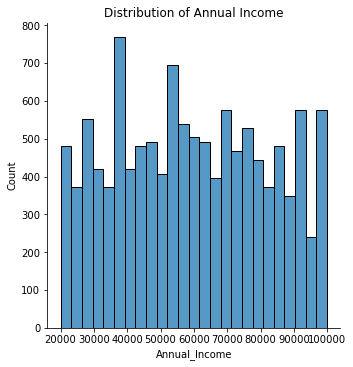

In [151]:
sns.displot(loan_df["Annual_Income"])
plt.title('Distribution of Annual Income')
plt.show()

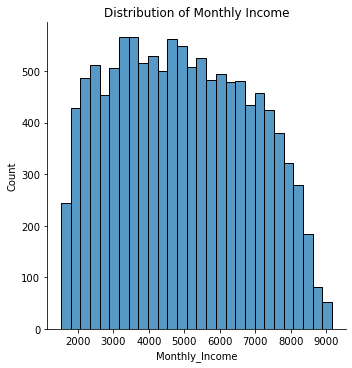

In [150]:
sns.displot(loan_df["Monthly_Income"])
plt.title('Distribution of Monthly Income')
plt.show()

In [36]:
loan_df.dtypes

Applicant_ID                        int64
Month                               int64
Monthly_Income                    float64
Annual_Income                     float64
Employment_Status                  object
House_Status                       object
Employment_History_Years            int64
Online_Spending_Behavior_Score      int64
Utility_Bill_Payment_Score          int64
Number_of_Open_Accounts             int64
Credit_History_Years                int64
Food_Expense                      float64
Transportation_Expense            float64
Home_Utility_Expense              float64
Shopping_Expense                  float64
Environmental_Spending            float64
Loan_Amount_Requested             float64
Loan_Term                         float64
Purpose                            object
Approval_Status                    object
dtype: object

In [37]:
repay_df.dtypes

Applicant_ID                 int64
Loan_Amount_Requested      float64
Loan_Term                    int64
Interest_Rate              float64
Monthly_Payment            float64
Defaulted                    int64
Number_of_Delinquencies      int64
dtype: object

In [72]:
numeric_loan_df=loan_df[['Applicant_ID', 'Monthly_Income', 'Annual_Income', 'Employment_History_Years',
       'Online_Spending_Behavior_Score', 'Utility_Bill_Payment_Score',
       'Number_of_Open_Accounts', 'Credit_History_Years', 'Food_Expense',
       'Transportation_Expense', 'Home_Utility_Expense', 'Shopping_Expense',
       'Environmental_Spending', 'Loan_Amount_Requested', 'Loan_Term']].copy()
cat_loan_df=loan_df[['Employment_Status','Month','House_Status','Purpose', 'Approval_Status']].copy()
numeric_repay_df=repay_df[['Applicant_ID', 'Loan_Amount_Requested', 'Loan_Term', 'Interest_Rate',
       'Monthly_Payment','Number_of_Delinquencies']].copy()
cat_repay_df=repay_df[['Defaulted']].copy()

In [73]:
numeric_loan_df.head()

,Applicant_ID,Monthly_Income,Annual_Income,Employment_History_Years,Online_Spending_Behavior_Score,Utility_Bill_Payment_Score,Number_of_Open_Accounts,Credit_History_Years,Food_Expense,Transportation_Expense,Home_Utility_Expense,Shopping_Expense,Environmental_Spending,Loan_Amount_Requested,Loan_Term
0,1,5183.323695,68000.0,8,59,72,15,6,922.750076,526.172189,478.838099,613.691429,233.234270,NaN,NaN
1,1,5303.792402,68000.0,8,59,72,15,6,1224.588843,772.986555,288.202223,532.934475,253.592265,NaN,NaN
2,1,5952.849727,68000.0,8,59,72,15,6,689.611784,511.166729,570.383323,620.316175,239.621365,NaN,NaN
3,1,5817.215818,68000.0,8,59,72,15,6,1599.844501,348.729081,349.287851,950.032027,189.052402,NaN,NaN
4,1,5265.616072,68000.0,8,59,72,15,6,986.321474,769.375634,345.671968,952.947648,180.274156,NaN,NaN


In [74]:
cat_loan_df.head()

,Employment_Status,Month,House_Status,Purpose,Approval_Status
0,part time,1,Own,NaN,NaN
1,part time,2,Own,NaN,NaN
2,part time,3,Own,NaN,NaN
3,part time,4,Own,NaN,NaN
4,part time,5,Own,NaN,NaN


In [75]:
numeric_repay_df.head()

,Applicant_ID,Loan_Amount_Requested,Loan_Term,Interest_Rate,Monthly_Payment,Number_of_Delinquencies
0,1,12116.231097,9,0.14,2449.518859,1
1,3,2970.974279,7,0.09,590.304415,5
2,4,3888.147185,24,0.14,568.846978,2
3,6,10955.281895,7,0.10,2250.275152,1
4,7,10924.348421,18,0.10,1332.008231,2


In [76]:
cat_repay_df.head()

,Defaulted
0,0
1,0
2,1
3,0
4,0


In [174]:
#numeric_loan_df columns
for column in numeric_loan_df.columns:
    print(column)

Applicant_ID
Monthly_Income
Annual_Income
Employment_History_Years
Online_Spending_Behavior_Score
Utility_Bill_Payment_Score
Number_of_Open_Accounts
Credit_History_Years
Food_Expense
Transportation_Expense
Home_Utility_Expense
Shopping_Expense
Environmental_Spending
Loan_Amount_Requested
Loan_Term


In [175]:
#cat_loan_df columns
for column in cat_loan_df.columns:
    print(column)

Employment_Status
Month
House_Status
Purpose
Approval_Status


In [176]:
#numeric_repay_df columns
for column in numeric_repay_df.columns:
    print(column)

Applicant_ID
Loan_Amount_Requested
Loan_Term
Interest_Rate
Monthly_Payment
Number_of_Delinquencies


In [178]:
#cat_repay_df columns
for column in cat_repay_df.columns:
    print(column)

Defaulted


# 2. Descriptive Analytics
## Basic Statistics
Provide mean, median, mode, standard deviation, and range for numerical variables. For categorical variables, offer frequency distributions.

###### Numerical Variables - Loan Application Data


In [89]:
numeric_loan_df.describe()

,Applicant_ID,Monthly_Income,Annual_Income,Employment_History_Years,Online_Spending_Behavior_Score,Utility_Bill_Payment_Score,Number_of_Open_Accounts,Credit_History_Years,Food_Expense,Transportation_Expense,Home_Utility_Expense,Shopping_Expense,Environmental_Spending,Loan_Amount_Requested,Loan_Term
count,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1000.000000,1000.000000
mean,500.500000,4932.558922,59244.00000,10.629000,49.438000,49.438000,7.84800,10.452000,987.018564,495.151743,371.290708,863.547174,148.303553,15128.387675,14.632000
std,288.687019,1904.372589,22620.72292,5.803634,30.020714,29.192142,4.31908,5.790725,491.807571,244.857417,163.076572,404.508461,83.945173,9122.000866,5.502623
min,1.000000,1521.651247,20000.00000,1.000000,0.000000,0.000000,1.00000,1.000000,163.173791,86.222293,80.427966,156.240166,16.288982,1462.755142,6.000000
25%,250.750000,3330.789149,40000.00000,5.000000,23.750000,23.750000,4.00000,5.000000,596.718068,303.222940,239.763151,544.759385,81.750580,8096.853227,10.000000
50%,500.500000,4858.307750,58500.00000,11.000000,49.000000,51.000000,8.00000,10.000000,904.303724,449.318679,354.411082,799.263232,129.519412,13480.033042,15.000000
75%,750.250000,6484.582873,78000.00000,16.000000,77.000000,75.000000,11.00000,16.000000,1293.286079,648.690845,480.031500,1119.362116,201.842630,19722.671554,19.000000
max,1000.000000,9157.823992,100000.00000,20.000000,100.000000,100.000000,15.00000,20.000000,2651.161520,1328.461090,888.575411,2247.545444,442.369304,43116.665895,24.000000


In [143]:
#Numerical data in Loan application data

#Mean for Numerical Variables
print('Mean for Numerical Data in Loan application dataset')
print('')
print(numeric_loan_df.mean())
print('')
print('')
print('Median for Numerical Data in Loan application dataset')
print('')
print(numeric_loan_df.median())
print('')
print('')
#Standard deviation
print('Standard Deviation for Numerical Data in Loan application dataset')
print('')
print(numeric_loan_df.std())
print('')
print('')
print('Range for Numerical Data in Loan application dataset')
print('')
#Range
numeric_loan_df_range = numeric_loan_df.max() - numeric_loan_df.min()
print(numeric_loan_df_range)
print('')
print('')
#Mode for Numerical Variables
numeric_loan_df_mode = numeric_loan_df[['Annual_Income','Employment_History_Years','Online_Spending_Behavior_Score','Utility_Bill_Payment_Score','Number_of_Open_Accounts','Credit_History_Years','Loan_Term']].mode()
print("Mode for Numerical Data in Loan application Dataset")
print('')
print(numeric_loan_df_mode.head(1))


Mean for Numerical Data in Loan application dataset

Applicant_ID                        500.500000
Monthly_Income                     4932.558922
Annual_Income                     59244.000000
Employment_History_Years             10.629000
Online_Spending_Behavior_Score       49.438000
Utility_Bill_Payment_Score           49.438000
Number_of_Open_Accounts               7.848000
Credit_History_Years                 10.452000
Food_Expense                        987.018564
Transportation_Expense              495.151743
Home_Utility_Expense                371.290708
Shopping_Expense                    863.547174
Environmental_Spending              148.303553
Loan_Amount_Requested             15128.387675
Loan_Term                            14.632000
dtype: float64


Median for Numerical Data in Loan application dataset

Applicant_ID                        500.500000
Monthly_Income                     4858.307750
Annual_Income                     58500.000000
Employment_History_Years     

###### Numerical Variables - Repayment Data


In [83]:
numeric_repay_df.describe()

,Applicant_ID,Loan_Amount_Requested,Loan_Term,Interest_Rate,Monthly_Payment,Number_of_Delinquencies
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,487.590000,13914.512675,14.620000,0.093050,1926.487516,2.455000
std,288.798743,8992.505642,5.382195,0.035211,1312.972192,1.720574
min,1.000000,2689.429303,6.000000,0.040000,233.471041,0.000000
25%,250.750000,7247.969924,10.000000,0.060000,895.839619,1.000000
50%,500.500000,12044.833830,15.000000,0.090000,1678.476077,2.000000
75%,750.250000,18440.131307,19.000000,0.120000,2573.159367,4.000000
max,1000.000000,42474.519838,24.000000,0.150000,7042.623718,5.000000


In [180]:
#Numerical data in Repayment data

#Mean for Numerical Variables
print('Mean for Numerical Data in Repayment dataset')
print('')
print(numeric_repay_df.mean())
print('')
print("-" * 40)
print('Median for Numerical Data in Repayment dataset')
print('')
print(numeric_repay_df.median())
print('')
print('')
#Standard deviation
print("-" * 40)
print('Standard Deviation for Numerical Data in Repayment dataset')
print('')
print(numeric_repay_df.std())
print('')
print("-" * 40)
print('Range for Numerical Data in Repayment dataset')
print('')
#Range
numeric_repay_df_range = numeric_repay_df.max() - numeric_repay_df.min()
print(numeric_repay_df_range)
print('')
print('')
#Mode for Numerical Variables
numeric_repay_df_mode = numeric_repay_df[['Loan_Term', 'Interest_Rate', 'Number_of_Delinquencies']].mode()
print("-" * 40)
print("Mode for Numerical Data in Repayment Dataset")
print('')
print(numeric_repay_df_mode)
print('')

Mean for Numerical Data in Repayment dataset

Applicant_ID                 487.590000
Loan_Amount_Requested      13914.512675
Loan_Term                     14.620000
Interest_Rate                  0.093050
Monthly_Payment             1926.487516
Number_of_Delinquencies        2.455000
dtype: float64

----------------------------------------
Median for Numerical Data in Repayment dataset

Applicant_ID                 500.500000
Loan_Amount_Requested      12044.833830
Loan_Term                     15.000000
Interest_Rate                  0.090000
Monthly_Payment             1678.476077
Number_of_Delinquencies        2.000000
dtype: float64


----------------------------------------
Standard Deviation for Numerical Data in Repayment dataset

Applicant_ID                288.798743
Loan_Amount_Requested      8992.505642
Loan_Term                     5.382195
Interest_Rate                 0.035211
Monthly_Payment            1312.972192
Number_of_Delinquencies       1.720574
dtype: float64

-

##### Categorical Variables
Frequency Distributions

In [162]:
# Display frequency distributions for each column
for column in cat_loan_df.columns:
    print(f"Frequency distribution for {column}:\n")
    print(cat_loan_df[column].value_counts(dropna=False))
    print("-" * 40)
    
    
for column in cat_repay_df.columns:
    print(f"Frequency distribution for {column}:\n")
    print(cat_repay_df[column].value_counts(dropna=False))
    print("-" * 40)

Frequency distribution for Employment_Status:

full time    6480
part time    5520
Name: Employment_Status, dtype: int64
----------------------------------------
Frequency distribution for Month:

8     1000
1     1000
9     1000
2     1000
10    1000
3     1000
11    1000
4     1000
12    1000
5     1000
6     1000
7     1000
Name: Month, dtype: int64
----------------------------------------
Frequency distribution for House_Status:

Rented    6096
Own       5904
Name: House_Status, dtype: int64
----------------------------------------
Frequency distribution for Purpose:

NaN                   11000
Medical Expenses        264
Debt Consolidation      252
Home Improvement        244
Major Purchase          240
Name: Purpose, dtype: int64
----------------------------------------
Frequency distribution for Approval_Status:

NaN         11000
Rejected      600
Approved      400
Name: Approval_Status, dtype: int64
----------------------------------------
Frequency distribution for Defaulted

## Visualizations

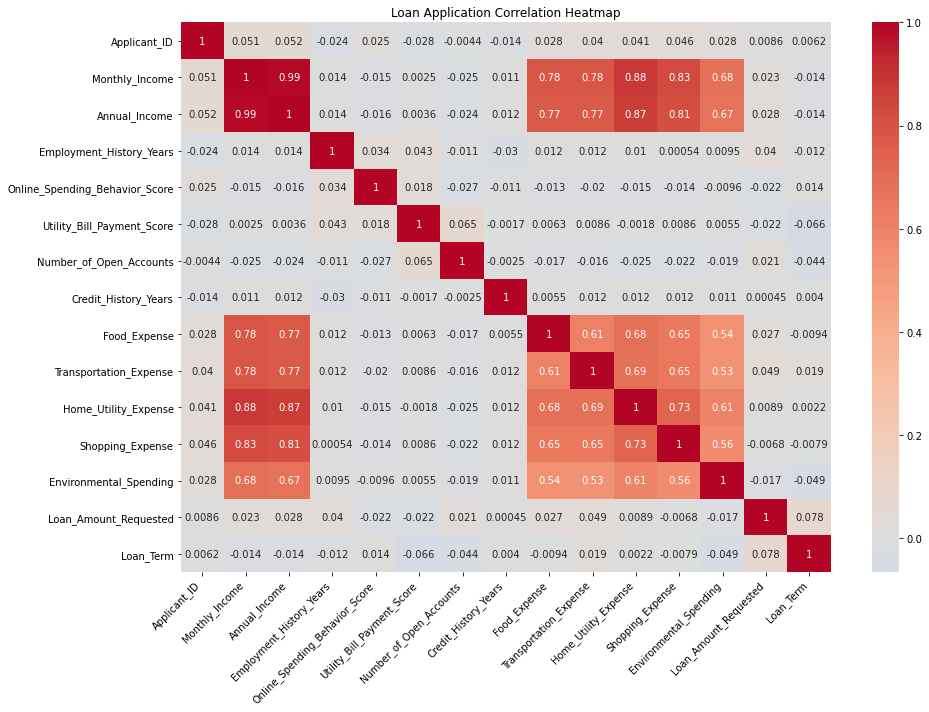

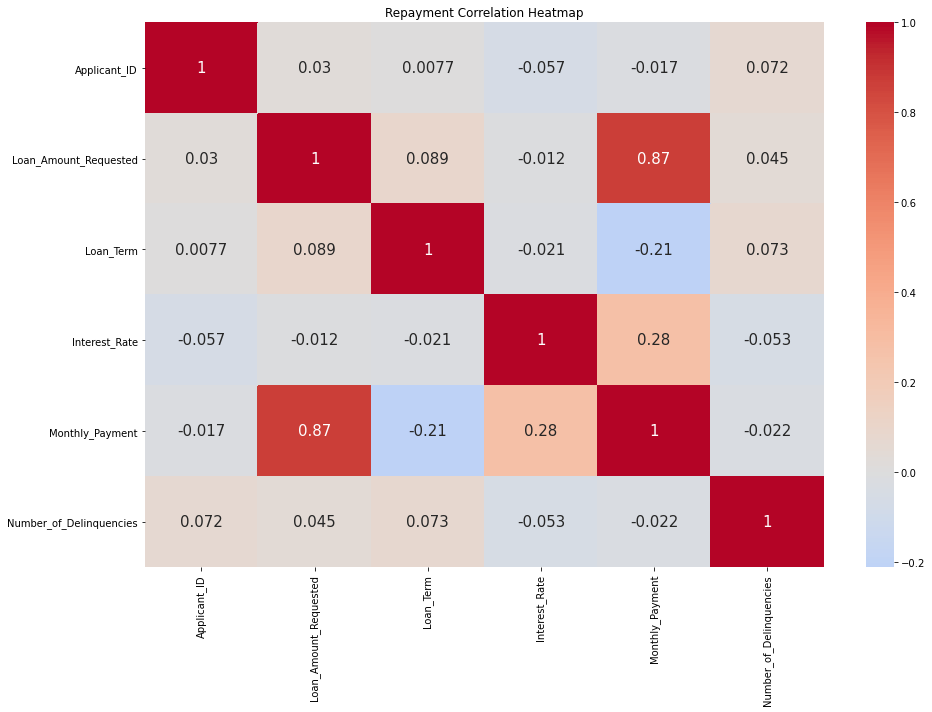

In [191]:
# Compute the Loan application correlation matrix
corr = numeric_loan_df.corr()

# Set the figure size
plt.figure(figsize=(14, 10))

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 10})

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.title('Loan Application Correlation Heatmap')
plt.tight_layout()
plt.show()


# Compute the Repayment correlation matrix
corr = numeric_repay_df.corr()

# Set the figure size
plt.figure(figsize=(14, 10))

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 15})

plt.title('Repayment Correlation Heatmap')
plt.tight_layout()
plt.show()

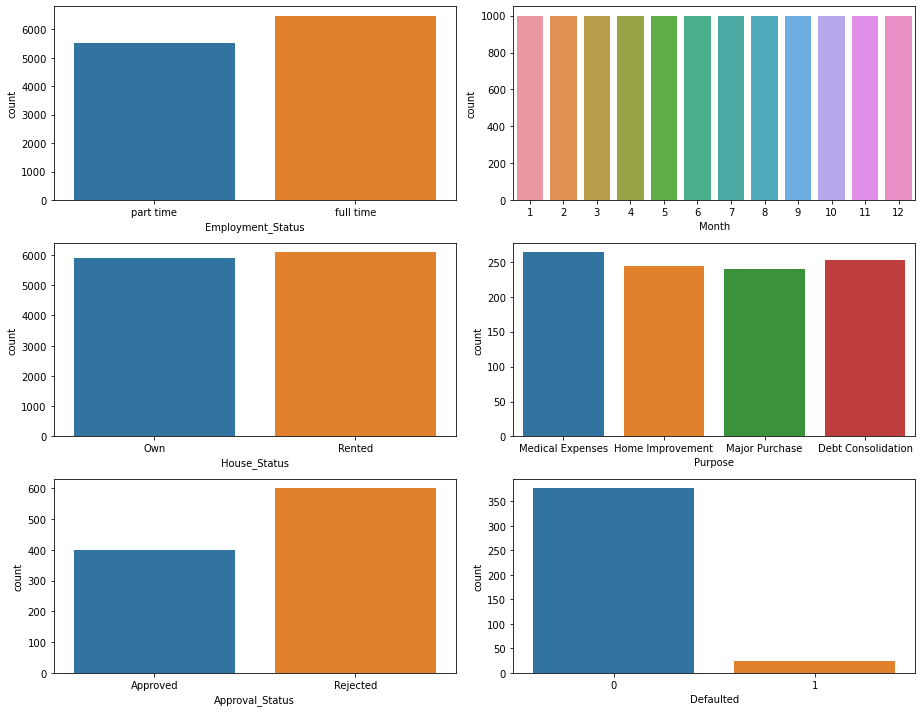

In [164]:
# Create a 3x2 grid of subplots (3 rows & 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(13, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot data on each subplot
sns.countplot(data=cat_loan_df, x='Employment_Status', ax=axes[0])
sns.countplot(data=cat_loan_df, x='Month', ax=axes[1])
sns.countplot(data=cat_loan_df, x='House_Status', ax=axes[2])
sns.countplot(data=cat_loan_df, x='Purpose', ax=axes[3])
sns.countplot(data=cat_loan_df, x='Approval_Status', ax=axes[4])
sns.countplot(data=cat_repay_df, x='Defaulted', ax=axes[5])

# Adjust layout
plt.tight_layout()
plt.show()

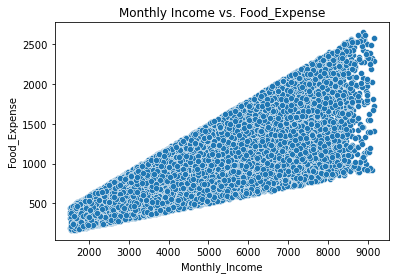

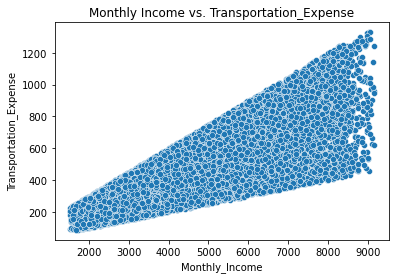

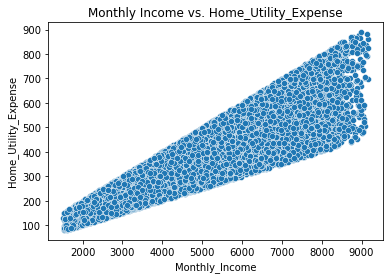

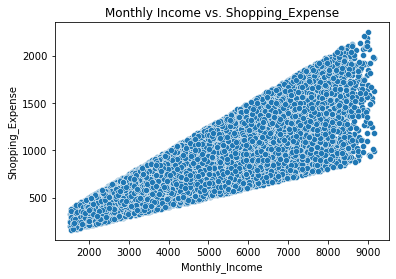

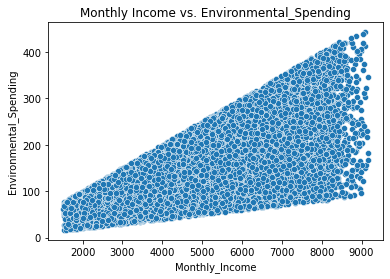

In [167]:
# List of expense-related columns based on the provided dataset
expense_columns = ['Food_Expense', 'Transportation_Expense', 'Home_Utility_Expense', 'Shopping_Expense', 'Environmental_Spending']

for expense in expense_columns:
    sns.scatterplot(data=numeric_loan_df, x='Monthly_Income', y=expense)
    plt.title(f'Monthly Income vs. {expense}')
    plt.show()

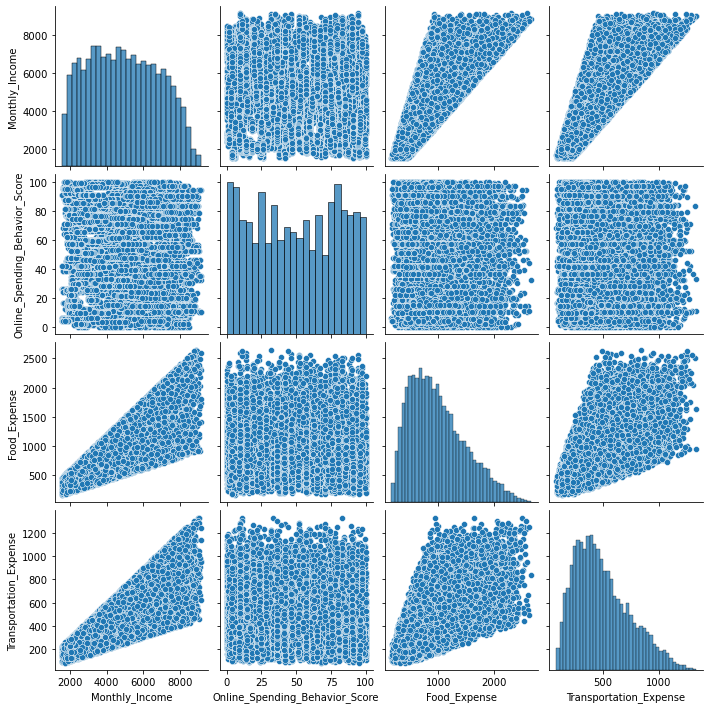

In [168]:
# Selecting a subset of columns for clarity
subset_columns = ['Monthly_Income', 'Online_Spending_Behavior_Score', 'Food_Expense', 'Transportation_Expense']
sns.pairplot(numeric_loan_df[subset_columns])
plt.show()

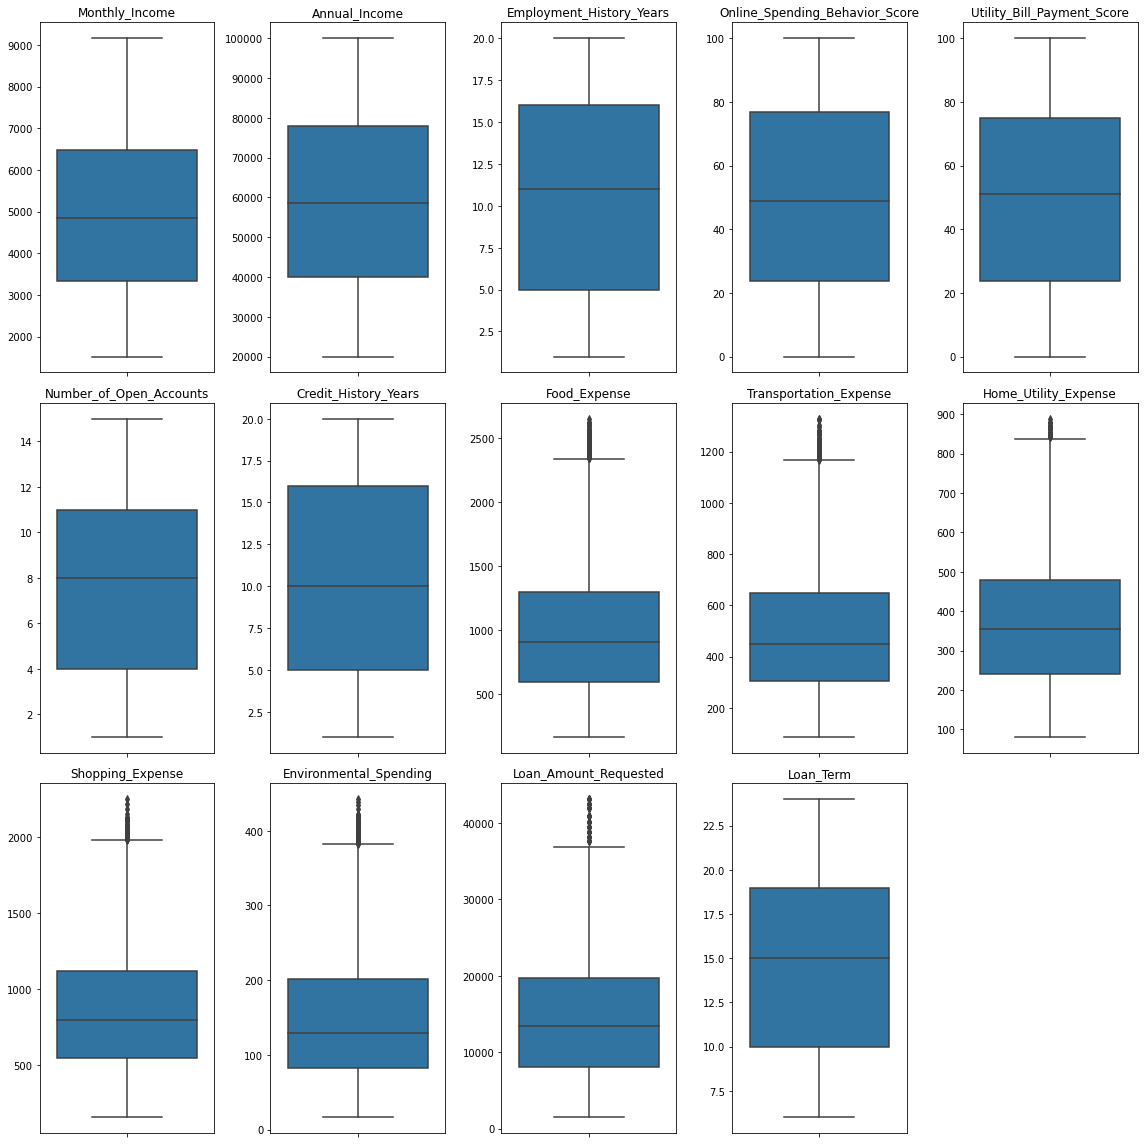

In [212]:

# Specify the columns to create box plots for
columns_to_plot = [
    'Monthly_Income', 'Annual_Income', 'Employment_History_Years',
    'Online_Spending_Behavior_Score', 'Utility_Bill_Payment_Score',
    'Number_of_Open_Accounts', 'Credit_History_Years', 'Food_Expense',
    'Transportation_Expense', 'Home_Utility_Expense', 'Shopping_Expense',
    'Environmental_Spending', 'Loan_Amount_Requested', 'Loan_Term'
]

plt.figure(figsize=(16, 16))  # Adjust the figure size as needed

for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 5, i + 1)  # Adjust the subplot layout as needed
    sns.boxplot(data=numeric_loan_df, y=column)
    plt.title(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

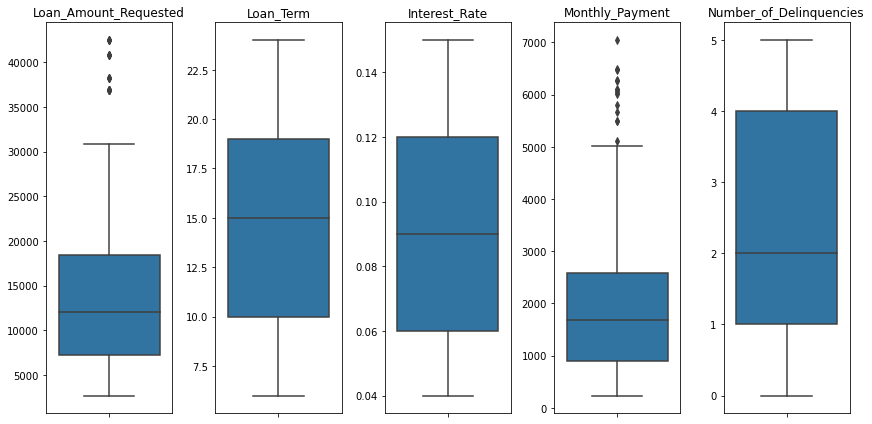

In [214]:
# Specify the columns to create box plots for
columns_to_plot = [
    'Loan_Amount_Requested', 'Loan_Term', 'Interest_Rate',
    'Monthly_Payment', 'Number_of_Delinquencies'
]

# Create Seaborn box plots for the specified columns
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

for i, column in enumerate(columns_to_plot):
    plt.subplot(1, 5, i + 1)  # Arrange in a single row with 5 columns
    sns.boxplot(data=numeric_repay_df, y=column)
    plt.title(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

### Anomaly Identification

In [215]:
numeric_loan_df.describe()

,Applicant_ID,Monthly_Income,Annual_Income,Employment_History_Years,Online_Spending_Behavior_Score,Utility_Bill_Payment_Score,Number_of_Open_Accounts,Credit_History_Years,Food_Expense,Transportation_Expense,Home_Utility_Expense,Shopping_Expense,Environmental_Spending,Loan_Amount_Requested,Loan_Term
count,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1000.000000,1000.000000
mean,500.500000,4932.558922,59244.00000,10.629000,49.438000,49.438000,7.84800,10.452000,987.018564,495.151743,371.290708,863.547174,148.303553,15128.387675,14.632000
std,288.687019,1904.372589,22620.72292,5.803634,30.020714,29.192142,4.31908,5.790725,491.807571,244.857417,163.076572,404.508461,83.945173,9122.000866,5.502623
min,1.000000,1521.651247,20000.00000,1.000000,0.000000,0.000000,1.00000,1.000000,163.173791,86.222293,80.427966,156.240166,16.288982,1462.755142,6.000000
25%,250.750000,3330.789149,40000.00000,5.000000,23.750000,23.750000,4.00000,5.000000,596.718068,303.222940,239.763151,544.759385,81.750580,8096.853227,10.000000
50%,500.500000,4858.307750,58500.00000,11.000000,49.000000,51.000000,8.00000,10.000000,904.303724,449.318679,354.411082,799.263232,129.519412,13480.033042,15.000000
75%,750.250000,6484.582873,78000.00000,16.000000,77.000000,75.000000,11.00000,16.000000,1293.286079,648.690845,480.031500,1119.362116,201.842630,19722.671554,19.000000
max,1000.000000,9157.823992,100000.00000,20.000000,100.000000,100.000000,15.00000,20.000000,2651.161520,1328.461090,888.575411,2247.545444,442.369304,43116.665895,24.000000


In [216]:
numeric_repay_df.describe()

,Applicant_ID,Loan_Amount_Requested,Loan_Term,Interest_Rate,Monthly_Payment,Number_of_Delinquencies
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,487.590000,13914.512675,14.620000,0.093050,1926.487516,2.455000
std,288.798743,8992.505642,5.382195,0.035211,1312.972192,1.720574
min,1.000000,2689.429303,6.000000,0.040000,233.471041,0.000000
25%,250.750000,7247.969924,10.000000,0.060000,895.839619,1.000000
50%,500.500000,12044.833830,15.000000,0.090000,1678.476077,2.000000
75%,750.250000,18440.131307,19.000000,0.120000,2573.159367,4.000000
max,1000.000000,42474.519838,24.000000,0.150000,7042.623718,5.000000


There are outliers in 

numeric_repay_df: 

* loan amount requested,Monthly payment

numeric_load_df: 
* all the expenses columns

# 3. Analyzing Data for Insights
## Income-Consumption Relationship
Use appropriate statistical methods to determine and visualize the relationship between income and consumption levels


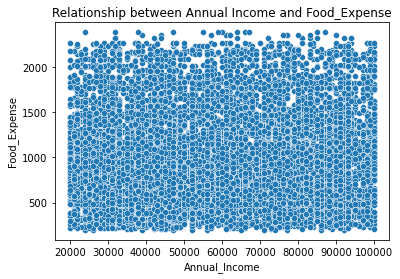

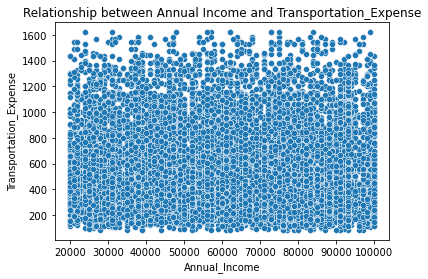

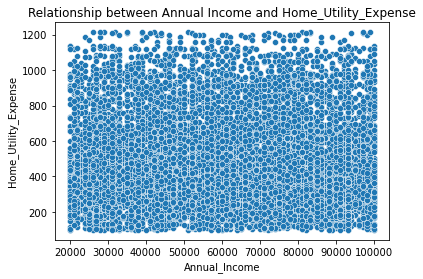

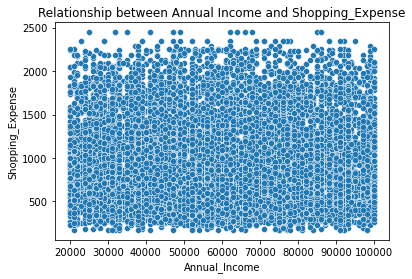

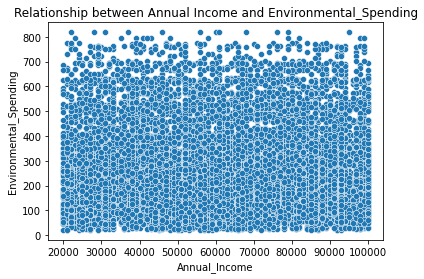

In [199]:
#why is there no relationship between annual income and environmental spending??

# Assuming df is your DataFrame
consumption_cols = ['Food_Expense', 'Transportation_Expense', 'Home_Utility_Expense', 'Shopping_Expense', 'Environmental_Spending']

for col in consumption_cols:
    sns.scatterplot(x='Annual_Income', y=col, data=df)
    plt.title(f'Relationship between Annual Income and {col}')
    plt.show()